<a href="https://colab.research.google.com/github/meiladrahmani556/concrete-strength-ml-dissertation/blob/main/Notebook/04_Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Objective

The purpose of this notebook is to perform exploratory data analysis (EDA)
on the cleaned concrete compressive strength dataset.

This analysis aims to:
- Understand the distribution of input features
- Identify relationships between variables
- Detect correlations with compressive strength
- Support informed model selection and feature engineering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)
plt.style.use("default")

In [2]:
from google.colab import files

uploaded = files.upload()

Saving concrete_data.csv to concrete_data.csv


In [6]:
# Load cleaned dataset (uploaded via Colab)
data_path = "concrete_data.csv"
df = pd.read_csv(data_path)

print("Dataset loaded successfully")
print("Shape:", df.shape)

df.head()

Dataset loaded successfully
Shape: (1030, 9)


,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [7]:
df.describe()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


This provides an overview of central tendency and dispersion for each feature,
highlighting differences in scale that may require normalization later.

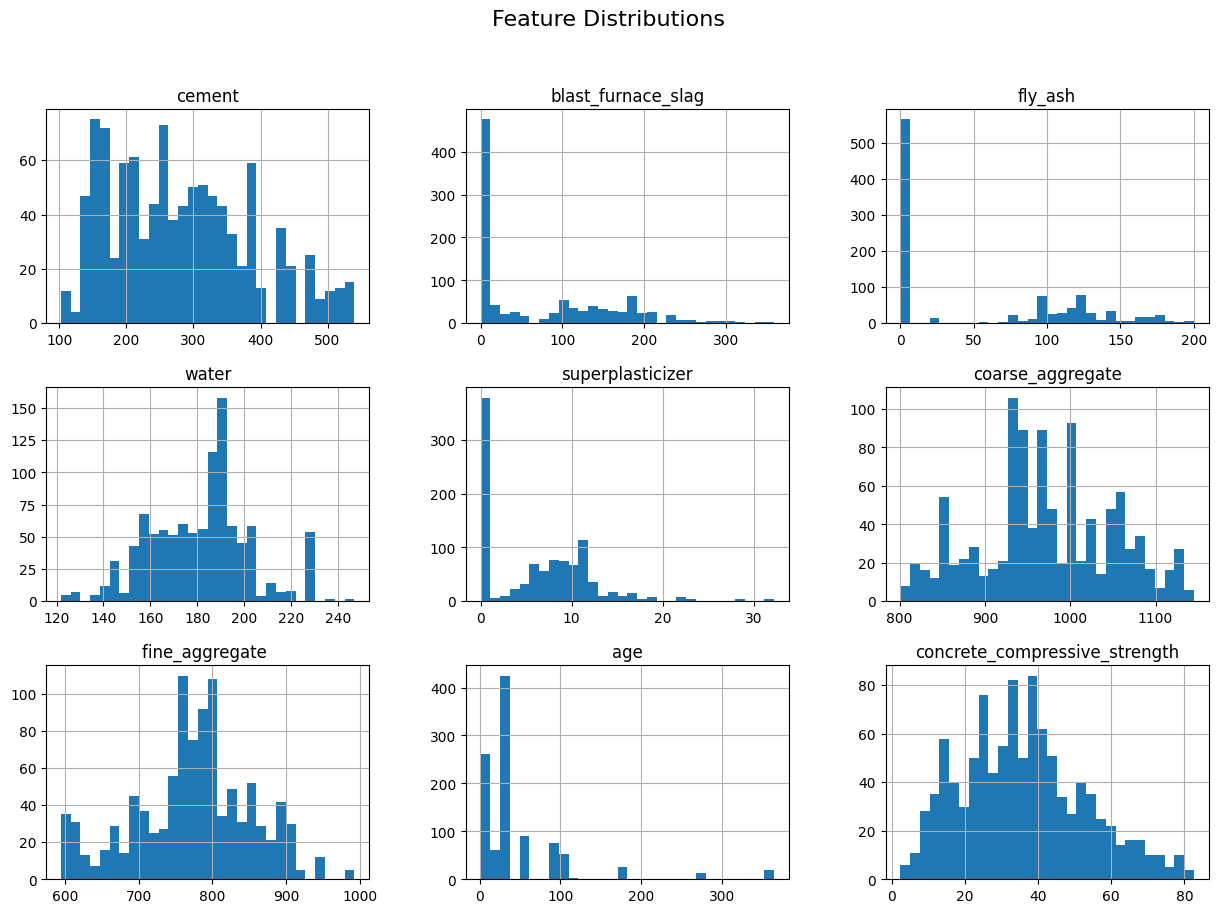

In [8]:
df.hist(bins=30, figsize=(15, 10))
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

Most features show non-normal distributions, indicating that scaling
or transformation may improve model performance.

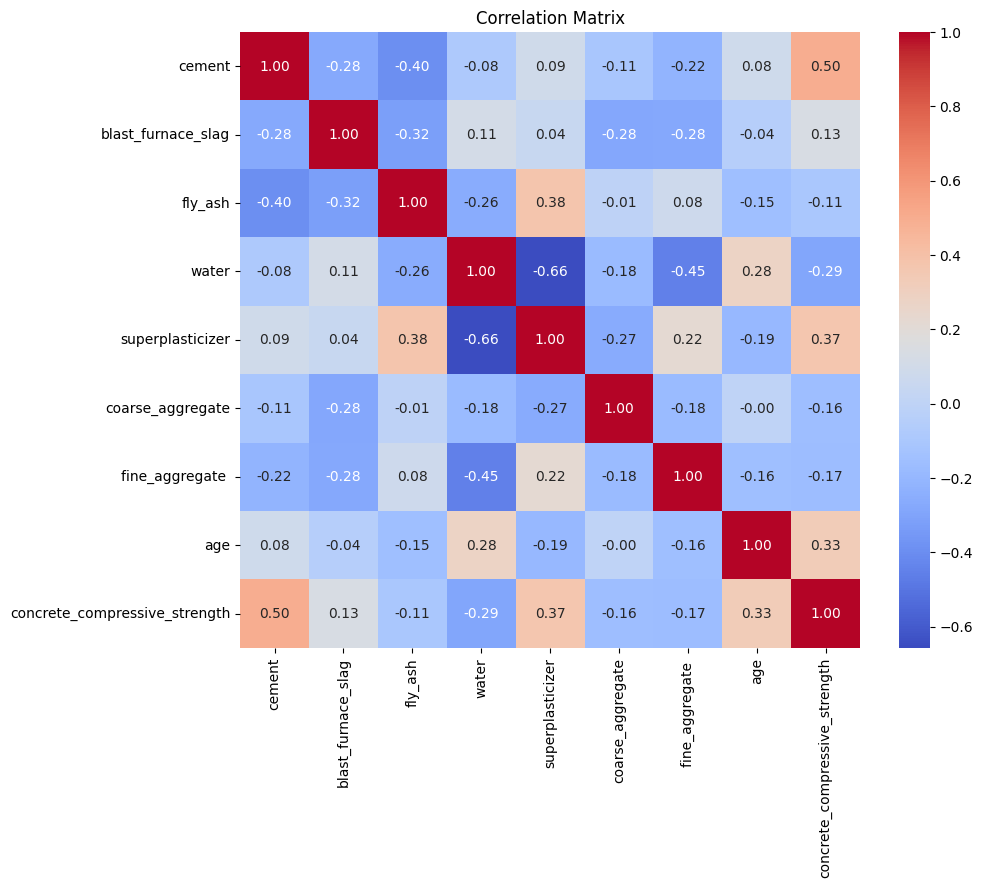

In [9]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [11]:
df.columns

Index(['cement', 'blast_furnace_slag', 'fly_ash', 'water', 'superplasticizer',
       'coarse_aggregate', 'fine_aggregate ', 'age',
       'concrete_compressive_strength'],
      dtype='object')

In [12]:
target_corr = df.corr()["concrete_compressive_strength"].sort_values(ascending=False)
target_corr

,concrete_compressive_strength
concrete_compressive_strength,1.000000
cement,0.497832
superplasticizer,0.366079
age,0.328873
blast_furnace_slag,0.134829
fly_ash,-0.105755
coarse_aggregate,-0.164935
fine_aggregate,-0.167241
water,-0.289633


Cement content and curing age show the strongest positive correlation
with compressive strength, aligning with engineering expectations.

## Key EDA Insights

- Compressive strength is most strongly influenced by cement content and age
- Several features show weak or moderate correlation, suggesting non-linear effects
- Feature scaling will be required before machine learning modelling
- Dataset is suitable for regression-based ML approaches